In [1]:
%pip install pandas
%pip install numpy
%pip install tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2

/bin/bash: /home/feyzi/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
/bin/bash: /home/feyzi/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
/bin/bash: /home/feyzi/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
x_train = np.concatenate([np.load("images_no20220719-124848-000001f_200_200_rgb_.npy"),np.load("images_no20220719-124905-000002f_200_200_rgb_.npy")])
y_train = np.concatenate([np.load("labels_no20220719-124848-000001f_200_200_rgb_.npy"), np.load("labels_no20220719-124905-000002f_200_200_rgb_.npy")])
x_test = np.load('images_no20220719-125005-000003f_200_200_rgb_.npy')
y_test = np.load('labels_no20220719-125005-000003f_200_200_rgb_.npy')

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(868, 200, 200, 3)
(868, 1)
(740, 200, 200, 3)
(740, 1)


In [4]:
num_classes = 2
no_users = 2
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])
print("-------")
print(y_test[0])

[1. 0.]
-------
[1. 0.]


In [5]:
print(x_train[0])
print(type(x_train[0][0][0][0]))
cv2.imshow("first x train image", x_train[0] / 255)
cv2.waitKey(0)

[[[171. 163. 146.]
  [173. 163. 146.]
  [176. 163. 147.]
  ...
  [ 85. 148. 202.]
  [ 87. 148. 200.]
  [ 92. 148. 199.]]

 [[175. 162. 146.]
  [175. 164. 147.]
  [177. 164. 147.]
  ...
  [ 93. 149. 203.]
  [ 93. 149. 201.]
  [ 96. 148. 200.]]

 [[173. 163. 146.]
  [177. 164. 147.]
  [177. 165. 148.]
  ...
  [ 98. 151. 202.]
  [ 97. 150. 202.]
  [ 98. 149. 200.]]

 ...

 [[  4.   2.   2.]
  [  5.   3.   2.]
  [ 12.  13.  12.]
  ...
  [  6.   7.   8.]
  [ 10.  14.  19.]
  [ 17.  20.  25.]]

 [[ 12.  14.   7.]
  [  3.   4.   1.]
  [  1.   1.   1.]
  ...
  [ 19.  20.  24.]
  [ 21.  23.  32.]
  [ 27.  31.  37.]]

 [[ 20.  20.  12.]
  [ 12.  11.   6.]
  [  8.   5.   2.]
  ...
  [ 21.  27.  34.]
  [ 30.  36.  41.]
  [ 44.  46.  45.]]]
<class 'numpy.float64'>


Qt: Session management error: Could not open network socket


113

In [6]:
x_train_new = np.ndarray(shape=(x_train.shape[0], x_train.shape[1], x_train.shape[2]))
for i in range(x_train.shape[0]):
    gray_scale_image =  cv2.cvtColor(x_train[i].astype(np.float32), cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(gray_scale_image.astype(np.uint8), (3,3), 0)
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
    x_train_new[i] = edges

In [7]:
x_test_new = np.ndarray(shape=(x_test.shape[0], x_test.shape[1], x_test.shape[2]))
for i in range(x_test.shape[0]):
    gray_scale_image =  cv2.cvtColor(x_test[i].astype(np.float32), cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(gray_scale_image.astype(np.uint8), (3,3), 0)
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
    x_test_new[i] = edges

In [8]:
x_train_new = np.reshape(x_train_new, (x_train_new.shape[0], 200*200))
x_test_new = np.reshape(x_test_new, (x_test_new.shape[0], 200*200))

In [9]:
print(x_train_new.shape)
print(x_test_new.shape)

(868, 40000)
(740, 40000)


In [10]:

K=4
L=2
M=1
N=1
s1 = 2
s2 = 2
numClasses = 2
class User:
    def __init__(self):
        self.W1 = tf.Variable(tf.random.truncated_normal([s1,s2,1,K], stddev=0.1))
        self.W2 = tf.Variable(tf.random.truncated_normal([s1,s2,K,L], stddev=0.1))
        self.W3 = tf.Variable(tf.random.truncated_normal([s1,s2,L,M], stddev=0.1))
        self.W4 = tf.Variable(tf.random.truncated_normal([50*50*M, N], stddev=0.1))
        self.W5 = tf.Variable(tf.random.truncated_normal([N,numClasses], stddev=0.1))
        
        self.b1 = tf.Variable(tf.random.truncated_normal([K]))#tf.Variable(tf.ones([K])/10)
        self.b2 = tf.Variable(tf.random.truncated_normal([L]))#tf.Variable(tf.ones([L])/10)
        self.b3 = tf.Variable(tf.random.truncated_normal([M]))#tf.Variable(tf.ones([M])/10)
        self.b4 = tf.Variable(tf.random.truncated_normal([N]))#tf.Variable(tf.ones([N])/10)
        self.b5 = tf.Variable(tf.random.truncated_normal([numClasses]))#tf.Variable(tf.ones([numClasses])/10)
        
        self.gW1 = tf.Variable(tf.random.truncated_normal([s1,s2,1,K], stddev=0.1))
        self.gW2 = tf.Variable(tf.random.truncated_normal([s1,s2,K,L], stddev=0.1))
        self.gW3 = tf.Variable(tf.random.truncated_normal([s1,s2,L,M], stddev=0.1))
        self.gW4 = tf.Variable(tf.random.truncated_normal([50*50*M, N], stddev=0.1))
        self.gW5 = tf.Variable(tf.random.truncated_normal([N,numClasses], stddev=0.1))
        
        self.gb1 = tf.Variable(tf.random.truncated_normal([K]))#tf.Variable(tf.ones([K])/10)
        self.gb2 = tf.Variable(tf.random.truncated_normal([L]))#tf.Variable(tf.ones([L])/10)
        self.gb3 = tf.Variable(tf.random.truncated_normal([M]))#tf.Variable(tf.ones([M])/10)
        self.gb4 = tf.Variable(tf.random.truncated_normal([N]))#tf.Variable(tf.ones([N])/10)
        self.gb5 = tf.Variable(tf.random.truncated_normal([numClasses]))#tf.Variable(tf.ones([numClasses])/10)
        
    def neural_net(self, x):
        C1 = tf.nn.conv2d(tf.reshape(x,[x.shape[0],200,200,1]), self.W1, strides=[1,1,1,1], padding="SAME")
        y1 = tf.nn.softmax(C1+self.b1)
        C2 = tf.nn.conv2d(y1, self.W2, strides=[1,2,2,1], padding="SAME")
        y2 = tf.nn.softmax(C2+self.b2)        
        C3 = tf.nn.conv2d(y2, self.W3, strides=[1,2,2,1], padding="SAME")
        y3 = tf.nn.softmax(C3+self.b3)         
        YY=tf.reshape(y3, shape=[-1, 50*50*M])
        
        y4 = tf.nn.softmax(tf.matmul(YY, self.W4)+self.b4)
        ylogits = tf.matmul(y4, self.W5)
        return tf.nn.softmax(ylogits+self.b5)

In [11]:
# mini-batch loss function.
def mini_batches(X, Y, mb_size):

    m = X.shape[0]
    perm = list(np.random.permutation(m))
    X_temp = X[perm,:]
    Y_temp = Y[perm,:].reshape((m, Y.shape[1]))
    
    X_r = tf.convert_to_tensor(X_temp[0:mb_size,:], dtype=np.float32)
    Y_r = tf.convert_to_tensor(Y_temp[0:mb_size,:], dtype=np.float32)
    return X_r,Y_r

In [12]:
# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return -tf.reduce_sum(y_true * tf.math.log(y_pred))

In [13]:
# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

In [14]:
# Optimization process. 
def get_gradients(x, y, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
    # Variables to update, i.e. trainable variables.
    trainable_variables = [W1, W2, W3, W4, W5, b1, b2, b3, b4, b5]
    
    with tf.GradientTape() as g:
        C1 = tf.nn.conv2d(tf.reshape(x,[x.shape[0],200,200,1]), W1, strides=[1,1,1,1], padding="SAME")
        y1 = tf.nn.relu(C1+b1)
        C2 = tf.nn.conv2d(y1, W2, strides=[1,2,2,1], padding="SAME")
        y2 = tf.nn.relu(C2+b2)        
        C3 = tf.nn.conv2d(y2, W3, strides=[1,2,2,1], padding="SAME")
        y3 = tf.nn.relu(C3+b3)         
        YY=tf.reshape(y3, shape=[-1, 50*50*M])
        
        y4 = tf.nn.relu(tf.matmul(YY, W4)+b4)
        ylogits = tf.matmul(y4, W5)
        pred = tf.nn.softmax(ylogits+b5)
        loss = cross_entropy(pred, y) 
    
    # Compute gradients.
    gradients1, gradients2, gradients3, gradients4, gradients5, gradients_b1, gradients_b2, gradients_b3, gradients_b4, gradients_b5  = g.gradient(loss, trainable_variables)
    
    return gradients1, gradients2, gradients3, gradients4, gradients5, gradients_b1, gradients_b2, gradients_b3, gradients_b4, gradients_b5, loss

In [15]:
users = [User() for i in range(no_users)]
#rho = 20
eta = 100
central_modal = [tf.Variable(tf.random.truncated_normal([s1*s2*1*K,1], stddev=0.1)),\
                 tf.Variable(tf.random.truncated_normal([s1*s2*K*L,1], stddev=0.1)),\
                 tf.Variable(tf.random.truncated_normal([s1*s2*L*M,1], stddev=0.1)),\
                 tf.Variable(tf.random.truncated_normal([50*50*M*N,1], stddev=0.1)),\
                 tf.Variable(tf.random.truncated_normal([N*numClasses,1], stddev=0.1)),\
                 tf.Variable(tf.random.truncated_normal([K])),\
                 tf.Variable(tf.random.truncated_normal([L])),\
                 tf.Variable(tf.random.truncated_normal([M])),\
                 tf.Variable(tf.random.truncated_normal([N])),\
                 tf.Variable(tf.random.truncated_normal([numClasses]))]
#print(central_modal[5].shape[0])
#tf.Variable(tf.ones([K])),\
#                 tf.Variable(tf.ones([L])),\
#                 tf.Variable(tf.ones([M])),\
#                 tf.Variable(tf.ones([N])),\
#                 tf.Variable(tf.ones([numClasses]))]

2022-07-25 14:12:55.457116: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-25 14:12:58.108124: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/feyzi/.local/lib/python3.10/site-packages/cv2/../../lib64:/opt/ros/noetic/lib::/home/feyzi/miniconda3/lib/
2022-07-25 14:12:58.108458: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-07-25 14:12:58.668946: I ten

In [16]:
x_train_k = []
y_train_k = []
data_per_worker = int(x_train_new.shape[0]/no_users)
for i in range(no_users):
    first = i*data_per_worker
    last = first + data_per_worker
    x_train_k.append(x_train_new[first:last])
    y_train_k.append(y_train[first:last])

In [17]:
x_test = tf.convert_to_tensor(x_test_new, dtype=np.float32)
y_test = tf.convert_to_tensor(y_test, dtype=np.float32)

2022-07-25 14:13:02.471355: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 118400000 exceeds 10% of free system memory.


In [18]:
mb_size = 15
n_iters = 300
lr = 0.0000001
#n_localIter=1

In [19]:
Train_Acc = []
Test_Acc = []
acc_train = np.zeros([n_iters,1])
acc_test = np.zeros([n_iters,1])
total_loss = np.zeros([n_iters,1])

for i in range(no_users):
    users[i].W1.assign(tf.reshape(central_modal[0],[s1,s2,1,K]))
    users[i].W2.assign(tf.reshape(central_modal[1],[s1,s2,K,L]))
    users[i].W3.assign(tf.reshape(central_modal[2],[s1,s2,L,M]))
    users[i].W4.assign(tf.reshape(central_modal[3],[50*50*M, N]))
    users[i].W5.assign(tf.reshape(central_modal[4],[N,numClasses]))
    
    users[i].b1.assign(tf.reshape(central_modal[5],[K]))
    users[i].b2.assign(tf.reshape(central_modal[6],[L]))
    users[i].b3.assign(tf.reshape(central_modal[7],[M]))
    users[i].b4.assign(tf.reshape(central_modal[8],[N]))
    users[i].b5.assign(tf.reshape(central_modal[9],[numClasses]))


            
for k in range(n_iters):               
        batch_x = []
        batch_y = []
        for i in range(no_users):
            batch_xx , batch_yy = mini_batches(x_train_k[i],y_train_k[i],  mb_size)
            batch_x.append(batch_xx)
            batch_y.append(batch_yy) 
        for i in range(no_users):

            gradients1, gradients2, gradients3, gradients4, gradients5, gradients_b1, gradients_b2, gradients_b3, gradients_b4, gradients_b5, loss= get_gradients(batch_x[i], batch_y[i], users[i].W1,\
                                                                        users[i].W2, users[i].W3, users[i].W4, users[i].W5, users[i].b1, users[i].b2, users[i].b3, users[i].b4, users[i].b5)               
                                           
            users[i].gW1.assign(gradients1)
            users[i].gW2.assign(gradients2)
            users[i].gW3.assign(gradients3)
            users[i].gW4.assign(gradients4)
            users[i].gW5.assign(gradients5)
            
            users[i].gb1.assign(gradients_b1)
            users[i].gb2.assign(gradients_b2)
            users[i].gb3.assign(gradients_b3)
            users[i].gb4.assign(gradients_b4)
            users[i].gb5.assign(gradients_b5)
            
            
            total_loss[k] = total_loss[k] + loss
            
        temp11 = 0
        temp21 = 0
        temp31 = 0 
        temp41 = 0
        temp51 = 0
        
        temp1_b = 0
        temp2_b = 0
        temp3_b = 0 
        temp4_b = 0
        temp5_b = 0
        
        for i in range(no_users):           
            temp11 = temp11 + tf.reshape(users[i].gW1,[s1*s2*1*K,1])
            
            temp21 = temp21 + tf.reshape(users[i].gW2,[s1*s2*K*L,1]) 
                        
            temp31 = temp31 + tf.reshape(users[i].gW3,[s1*s2*L*M,1]) 
            
            temp41 = temp41 + tf.reshape(users[i].gW4,[50*50*M*N,1]) 
            
            temp51 = temp51 + tf.reshape(users[i].gW5,[N*numClasses,1]) 
            
            
            temp1_b = temp1_b + users[i].gb1#tf.reshape(users[i].gb1,[K,1])
            
            temp2_b = temp2_b + users[i].gb2#tf.reshape(users[i].gb2,[L,1]) 
                        
            temp3_b = temp3_b + users[i].gb3#tf.reshape(users[i].gb3,[M,1]) 
            
            temp4_b = temp4_b + users[i].gb4#tf.reshape(users[i].gb4,[64,1]) 
            
            temp5_b = temp5_b + users[i].gb5#tf.reshape(users[i].gb5,[10,1])
            
        central_modal[0] = central_modal[0]-1/(no_users)*lr*(temp11)
        central_modal[1] = central_modal[1]-1/(no_users)*lr*(temp21)
        central_modal[2] = central_modal[2]-1/(no_users)*lr*(temp31)
        central_modal[3] = central_modal[3]-1/(no_users)*lr*(temp41)
        central_modal[4] = central_modal[4]-1/(no_users)*lr*(temp51)
        
        central_modal[5] = central_modal[5]-1/(no_users)*lr*(temp1_b)
        central_modal[6] = central_modal[6]-1/(no_users)*lr*(temp2_b)
        central_modal[7] = central_modal[7]-1/(no_users)*lr*(temp3_b)
        central_modal[8] = central_modal[8]-1/(no_users)*lr*(temp4_b)
        central_modal[9] = central_modal[9]-1/(no_users)*lr*(temp5_b)
        
        #print(central_modal[5].shape[0])
        #print(central_modal[5].shape[1])
        
        for i in range(no_users):
                           
            users[i].W1.assign(tf.reshape(central_modal[0],[s1,s2,1,K]))
            users[i].W2.assign(tf.reshape(central_modal[1],[s1,s2,K,L]))
            users[i].W3.assign(tf.reshape(central_modal[2],[s1,s2,L,M]))
            users[i].W4.assign(tf.reshape(central_modal[3],[50*50*M, N]))
            users[i].W5.assign(tf.reshape(central_modal[4],[N,numClasses]))
            
            users[i].b1.assign(tf.reshape(central_modal[5],[K]))
            users[i].b2.assign(tf.reshape(central_modal[6],[L]))
            users[i].b3.assign(tf.reshape(central_modal[7],[M]))
            users[i].b4.assign(tf.reshape(central_modal[8],[N]))
            users[i].b5.assign(tf.reshape(central_modal[9],[numClasses]))
            
        train_acc = []
        test_acc = []
        for j in range(no_users):  
            train_pred = users[j].neural_net(batch_x[j])
            train_acc.append(accuracy(train_pred, batch_y[j]))
            test_pred = users[j].neural_net(x_test)
            test_acc.append(accuracy(test_pred, y_test))
        avgAcc_Train = np.mean(train_acc)
        avgAcc_Test = np.mean(test_acc)
        print('Train accuracy', avgAcc_Train)
        print('Test accuracy',avgAcc_Test)
        acc_train[k] = avgAcc_Train
        acc_test[k] = avgAcc_Test        

2022-07-25 14:13:07.014967: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28000000 exceeds 10% of free system memory.
2022-07-25 14:13:07.037367: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28000000 exceeds 10% of free system memory.
2022-07-25 14:13:07.060152: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28160000 exceeds 10% of free system memory.
2022-07-25 14:13:07.071141: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28160000 exceeds 10% of free system memory.


Train accuracy 0.13333334
Test accuracy 0.6310811
Train accuracy 0.06666667
Test accuracy 0.6310811
Train accuracy 0.16666667
Test accuracy 0.6310811
Train accuracy 0.13333334
Test accuracy 0.6310811
Train accuracy 0.16666667
Test accuracy 0.6310811
Train accuracy 0.36666667
Test accuracy 0.6310811
Train accuracy 0.20000002
Test accuracy 0.6310811
Train accuracy 0.20000002
Test accuracy 0.6310811
Train accuracy 0.16666667
Test accuracy 0.6310811
Train accuracy 0.2
Test accuracy 0.6310811
Train accuracy 0.20000002
Test accuracy 0.6310811
Train accuracy 0.13333334
Test accuracy 0.6310811
Train accuracy 0.23333335
Test accuracy 0.6310811
Train accuracy 0.16666667
Test accuracy 0.6310811


In [ ]:
acc_test[-1]

array([0.86250001])

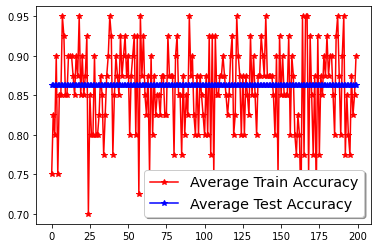

In [ ]:
import matplotlib.pyplot as plt

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(range(n_iters), acc_train, 'r-*', label='Average Train Accuracy')
ax.plot(range(n_iters), acc_test, 'b-*', label='Average Test Accuracy')

legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')

plt.show()

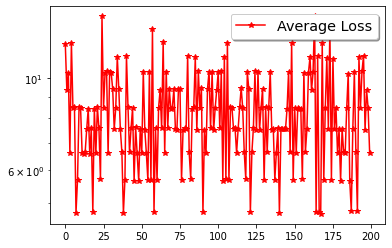

In [ ]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(range(n_iters), total_loss/no_users, 'r-*', label='Average Loss')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.yscale('log')
plt.show()